In [1]:
from imports import *
from exactDiagMethods import perform_exact_diag, build_exact_diag_hamiltonian
from globalMethods import output_results, build_initial_states
from vqteMethods import hamiltonian_generation, perform_vqte

In [2]:

def main():
    
    # Initialize the simulation parameters
    gamma = 0.5
    eps = 1
    mu = 3
    T = 50
    beta=1/T
    F = 1/(np.exp(beta*(eps-mu))+1)

    time = 50.0
    dt = 0.1
    nt = int(time/dt)

    ham_real, ham_imag = hamiltonian_generation(eps, gamma, mu, T)
    vqte_init_state, exact_diag_init_state, ansatz, init_param_values = build_initial_states(ham_real)
    exact_diag_ham = build_exact_diag_hamiltonian(eps)

    print(vqte_init_state)
    print(exact_diag_init_state)

    print("Exact diag ham: ", exact_diag_ham)
    print("VQTE real ham: ", ham_real)
    print("VQTE ham im: ", ham_imag)

    # Perform exact diagonalization
    exact_diag_results, time_points = perform_exact_diag(gamma, F, dt, nt, exact_diag_init_state,exact_diag_ham)

    # Perform VQTE simulation
    vqte_results, trace_list = perform_vqte(ham_real, ham_imag, vqte_init_state, mu, T, dt, nt, ansatz, init_param_values)

    # Output results
    output_results(vqte_results, exact_diag_results, time, nt, eps, mu, T, time_points, trace_list)

    print(vqte_results[-1])
    print(exact_diag_results[-1])

Statevector([ 1.0000000e+00+4.89858720e-16j,
             -1.2246468e-16-2.99951957e-32j,
             -2.4492936e-16-2.99951957e-32j,
             -1.2246468e-16+2.99951957e-32j],
            dims=(2, 2))
[[ 1.0000000e+00+4.89858720e-16j -2.4492936e-16-2.99951957e-32j]
 [-1.2246468e-16-2.99951957e-32j -1.2246468e-16+2.99951957e-32j]]
Exact diag ham:  [[0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]
VQTE real ham:  SparsePauliOp(['IZ', 'ZI', 'XY', 'YX'],
              coeffs=[-0.5       +0.j,  0.5       +0.j,  0.00249967+0.j,  0.00249967+0.j])
VQTE ham im:  SparsePauliOp(['XX', 'YY', 'II', 'IZ', 'ZI'],
              coeffs=[-0.125     +0.j,  0.125     -0.j,  0.25      -0.j,  0.00249967-0.j,
  0.00249967-0.j])
Reference number operator expectation value: (0.5099986668799655+0j)
Is Hermitian: True
Trace: (0.9999999999999999+4.898587196589413e-16j) (should be 1)
Eigenvalues: [-1.2246468e-16  1.0000000e+00]
All eigenvalues ≥ 0: False
Purity (Tr(ρ²)): (1+9.797174393178826e-16j) (should be 1 for pure stat

C:\Users\tessa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\tessa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


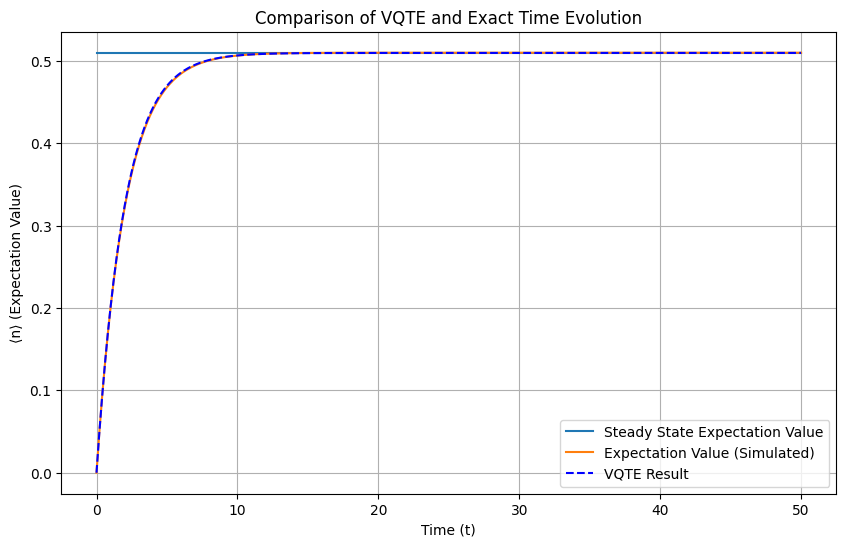

(0.5097486027233206-1.8362718909955583e-16j)
(0.509998666872883+4.9303806576313085e-32j)


In [3]:
main()